In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

A game company thinks that it's game will sell better if it's rated 'T' instead of 'E'

The Problem:
SomeGameCompany is making a game.  Because their last few games have not sold particularly well, the company is under a lot of pressure to make sure that sales for their new game are up compared to prior games.  The CEO is convinced that their poor sales are a result of the company's games not appealing to a wide enough audience.  

The Potential Solution:
Ensuring that their new game is rated 'E' for Everyone, instead of 'T' for Teen, will increase sales of their new game by making it seem more appealing to a mass market audience.

The Method:


In [94]:
games = pd.read_csv('vgs12-22-2016.csv')
games = games.replace('tbd', np.nan)
games['User_Score'] = pd.to_numeric(games['User_Score'])
games = games[games['Year_of_Release'] < 2017.0]
games = games[games['Year_of_Release'] > 1999.0]
games = games[games['Rating'] != 'RP']
games = games[games['Rating'] != 'AO']
games = games[games['Rating'] != 'K-A']
games = games[games['Rating'] != 'EC']
games = games.replace('E10+', 'E')
#games = games[games['Platform'] != 'DS']
#games = games[games['Platform'] != '3DS']
#games = games[games['Platform'] != 'PSV']
#games = games[games['Platform'] != 'PSP']
#games = games[games['Platform'] != 'GBA']
games = games[games['Genre'].notnull()]
games = games[games['Rating'].notnull()]
games = games[games['Year_of_Release'].notnull()]
#games = games[games['Global_Sales'] < 10]
games.shape

(9653, 16)

In [95]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E


In [119]:
rate_games = games.groupby('Rating')
rate_sales = rate_games['Global_Sales']
rate_sales.describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
E,5273.0,0.569209,1.886053,0.01,0.08,0.2,0.51,82.53
M,1521.0,0.941736,1.937120,0.01,0.11,0.3,0.90,21.04
T,2859.0,0.483683,0.839887,0.01,0.08,0.2,0.53,12.84


In [96]:
games.Platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'XB', 'PC', 'PSP',
       'WiiU', 'GC', 'GBA', 'XOne', 'PS', 'PSV', 'DC'], dtype=object)

In [97]:
games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,7807.000000,7807.000000,7289.000000,7289.000000
mean,2007.687973,0.314143,0.180156,0.043402,0.064623,0.602576,68.863840,26.669143,7.112828,161.934833
std,3.985705,0.821958,0.584336,0.232752,0.230869,1.663040,13.885334,19.078745,1.499506,564.371326
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2005.000000,0.050000,0.010000,0.000000,0.010000,0.080000,60.000000,12.000000,6.400000,10.000000
50%,2008.000000,0.120000,0.040000,0.000000,0.020000,0.210000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.300000,0.150000,0.000000,0.050000,0.560000,79.000000,37.000000,8.200000,80.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [98]:
games.Developer.unique()

array(['Nintendo', 'Good Science Studio', 'Rockstar North', ...,
       'Big Red Software', 'Atomic Games', 'Interchannel-Holon'],
      dtype=object)

In [99]:
games.Genre.unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [100]:
games.Rating.unique()

array(['E', 'M', 'T'], dtype=object)

In [101]:
len(games[games['Rating'] == 'E'])

5273

In [102]:
len(games[games['Rating'] == 'T'])

2859

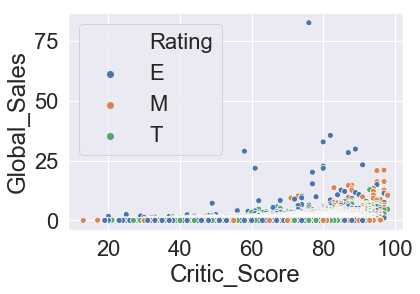

In [103]:
sns.scatterplot(x='Critic_Score', y = 'Global_Sales', hue='Rating', data=games)

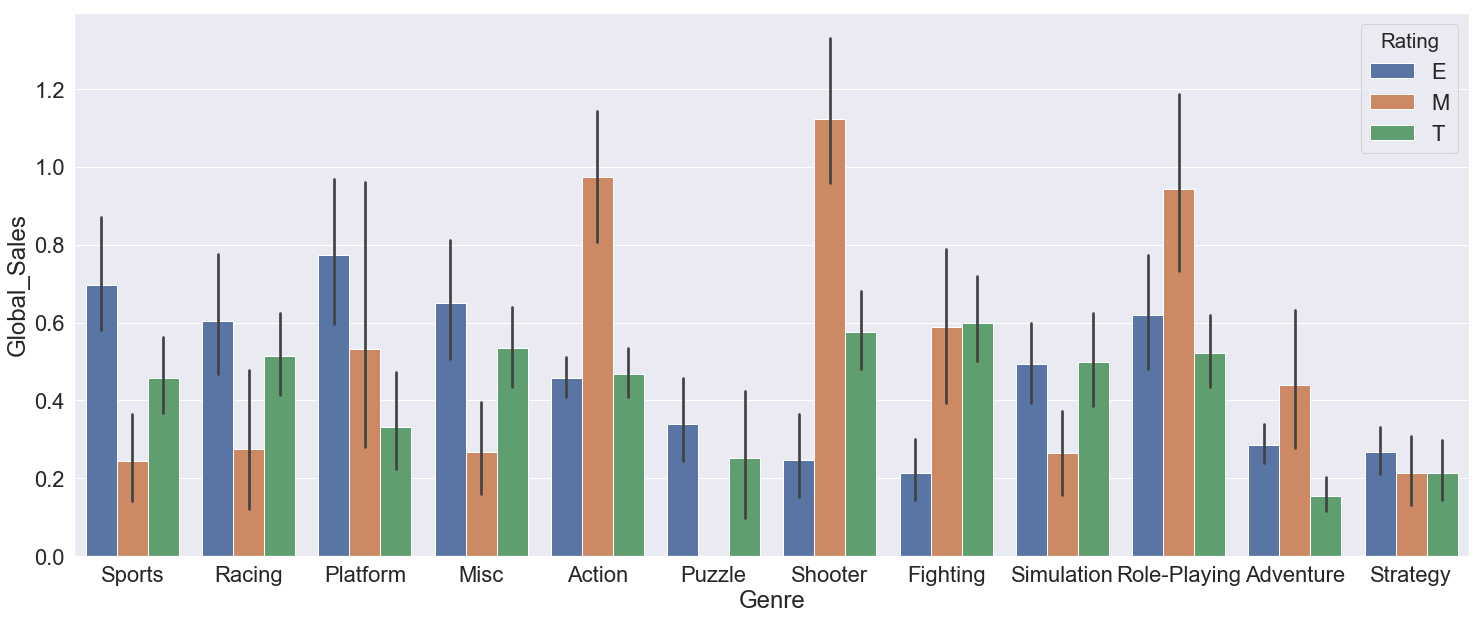

In [104]:
sns.set_style('whitegrid')
sns.set(font_scale = 2)
plt.subplots(figsize=(25,10))
sns.barplot(x='Genre', y='Global_Sales', hue='Rating', data=games)

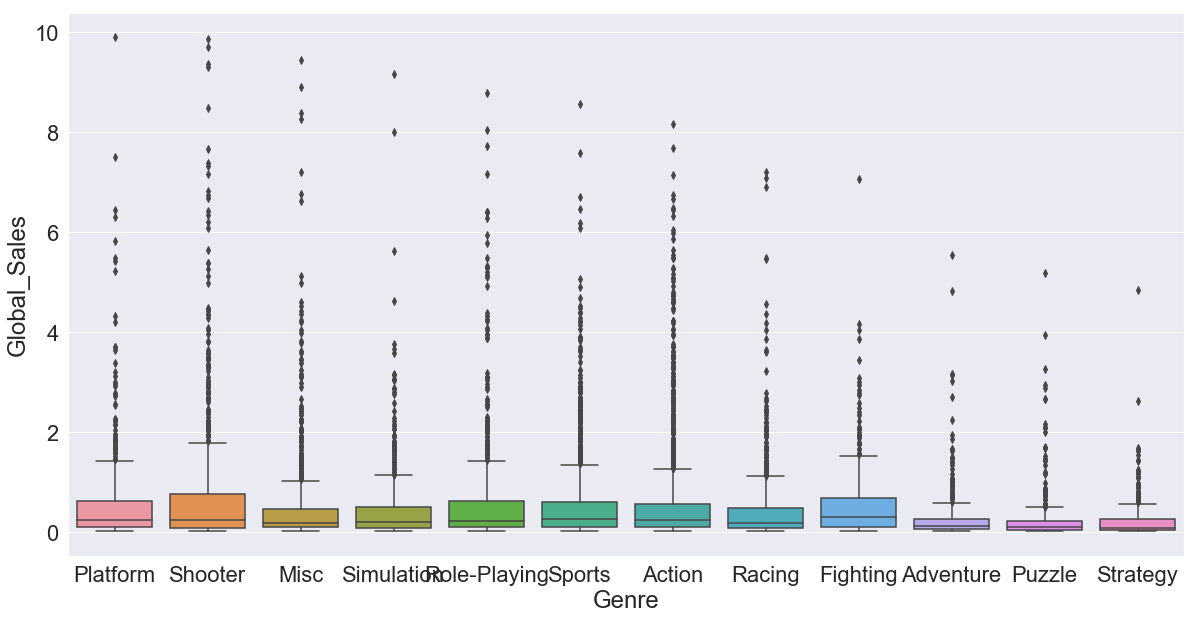

In [105]:
sales_norm = games[games['Global_Sales'] < 10]
plt.subplots(figsize=(20,10))
sns.boxplot(x='Genre', y='Global_Sales', data=sales_norm)

In [106]:
rating_et = games[games['Rating'].isin(['T', 'E'])]
#rating_t = games[games['Rating'] == 'T']

In [107]:
stats.ttest_ind(games[games.Rating == 'E'].Global_Sales,
               games[games.Rating == 'T'].Global_Sales, equal_var=False)

Ttest_indResult(statistic=2.817661203841697, pvalue=0.004849516644432195)

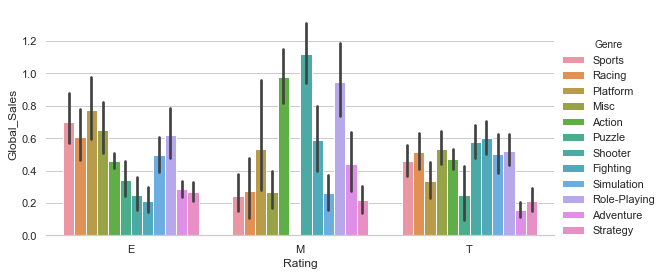

In [108]:
sns.set(style="whitegrid")
cat = sns.catplot(x="Rating", y="Global_Sales", hue='Genre', data=games,  
                  height=4, aspect=2, kind="bar")
cat.despine(left=True)

In [109]:
len(games[games['Rating'] == 'AO'])

0

In [110]:
sns.relplot(x='Year_of_Release', y='Global_Sales', hue='Rating', 
            col='Genre', kind='bar', data=games)

ValueError: Plot kind bar not recognized

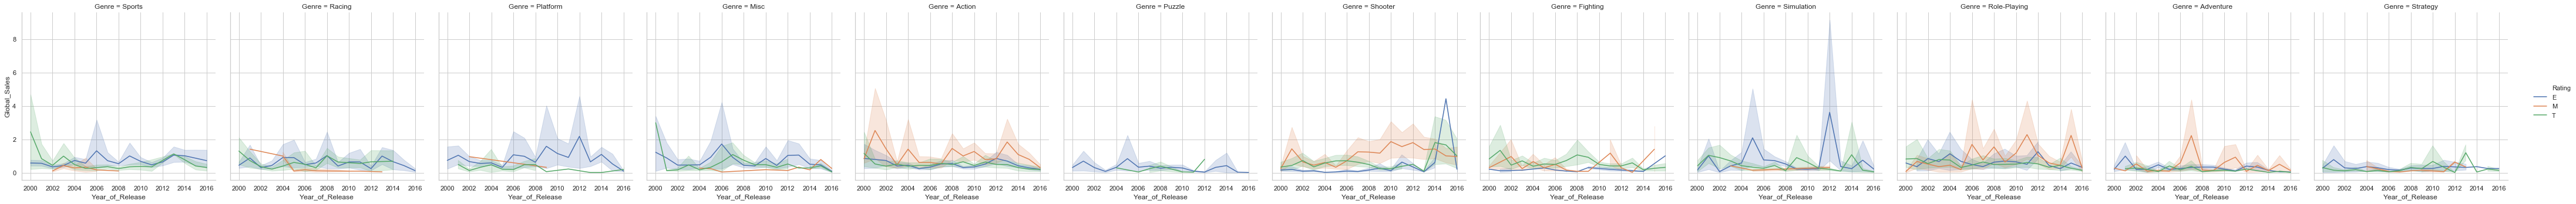

In [113]:
sns.relplot(x="Year_of_Release", y="Global_Sales",
            hue="Rating", col="Genre",
            height=5, aspect=1, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=games)